In [1]:
# Modifying the provided 'edited-model.py' to incorporate suggested improvements

# Modified script content with additional tuning, early stopping, and class distribution checks.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorboard import notebook

In [2]:
# Load the data
df = pd.read_csv('C:/Users/honey/Documents/placment work/Electronical-AI-Device-Recogniser/khanya/data managment/datasets/acs-f2-dataset.csv')

In [3]:

# Drop the 'time' column as it's not relevant for prediction
df = df.drop('time', axis=1)


In [4]:
# Convert categorical labels to numeric
le = LabelEncoder()
df['equipment'] = le.fit_transform(df['equipment'])

# Split features and labels
X = df.drop('equipment', axis=1)
y = df['equipment']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# One-hot encode the labels
y_resampled_onehot = to_categorical(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_onehot, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.layers import Input, Concatenate, Multiply
from tensorflow.keras import backend as K


# Define the model architecture with weighted input for 'freq' column and dropout
input_layer = Input(shape=(X_train.shape[1],))
freq_weight = K.constant([[2.0]])  # Convert the weight to a tensor with the same shape as freq_input

# Split the input into 'freq' and other features
freq_input = input_layer[:, 0:1]
other_features = input_layer[:, 1:]

# Apply the weight to the 'freq' column
weighted_freq = Multiply()([freq_input, freq_weight])

# Concatenate the weighted 'freq' column back with the other features
weighted_input = Concatenate()([weighted_freq, other_features])

# Define the rest of the model
x = Dense(256, activation='relu')(weighted_input)
x = Dropout(0.3)(x)  # Increased dropout for stronger regularization
# Define the number of classes
num_classes = y_resampled_onehot.shape[1]

# Continue with the existing code
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a lower learning rate for better generalization
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])


Epoch 1/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1617 - loss: 3.9843 - val_accuracy: 0.3320 - val_loss: 1.8620
Epoch 2/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3046 - loss: 1.9635 - val_accuracy: 0.4187 - val_loss: 1.6396
Epoch 3/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3976 - loss: 1.7057 - val_accuracy: 0.4928 - val_loss: 1.4565
Epoch 4/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4446 - loss: 1.5611 - val_accuracy: 0.5090 - val_loss: 1.3592
Epoch 5/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4848 - loss: 1.4522 - val_accuracy: 0.5551 - val_loss: 1.2855
Epoch 6/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5103 - loss: 1.3712 - val_accuracy: 0.5734 - val_loss: 1.2268
Epoch 7/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5281 - loss: 1.3224 - val_accuracy: 0.5645 - val_loss: 1.1787
Epoch 8/100
4041/4041 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5449 - loss: 1

1011/1011 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


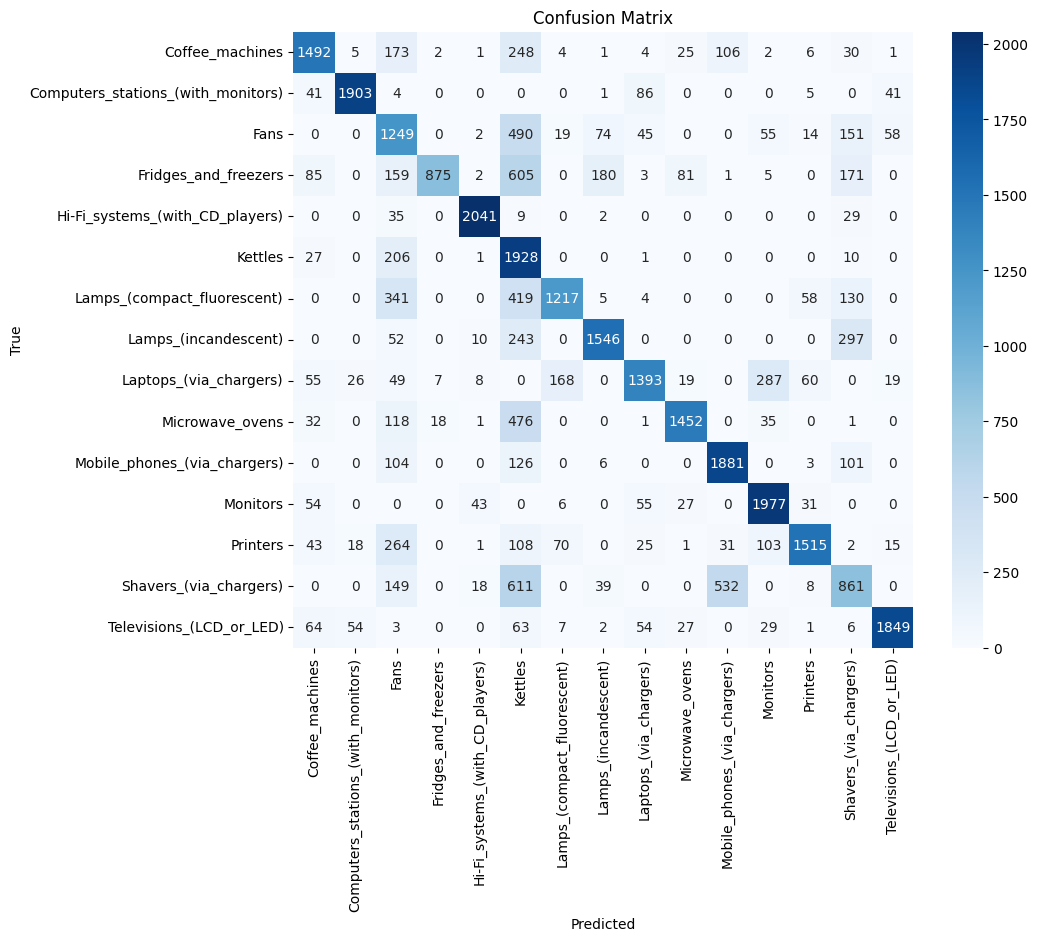

In [8]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained model and the scaler for future use
model.save('new-model1.0.4.keras')
joblib.dump(scaler, 'new-scaler1.0.4.pkl')

In [24]:
  # Return the new path so the user can download it